In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# functions
def print_value_counts(df: pd.DataFrame):
    '''Show value counts from categorical columns'''
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in df[categorical_columns].columns:
        print(f"Column: {column}")
        print(df[column].value_counts())
        print("\n" + "="*30 + "\n")


def _print_zero_val(df: pd.DataFrame, feature):
    '''helper function for show_zero_values()'''
    print(f'{feature}: in total: {df[feature][df[feature]==0].size} in percent: {df[feature][df[feature]==0].size / len(df) * 100:.2f}%')


def print_zero_values(df: pd.DataFrame, columns: list = None):
    '''Print amount of zero values in numerical features'''
    print('Amount of zero values:')
    if columns is None:
        columns = df.columns
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            _print_zero_val(df, feature=col)


def plot_numerical_features(df: pd.DataFrame, columns: list = None, as_boxplt: bool = False):
    '''Plot numerical features for each numerical feature'''
    if columns is not None:
        numerical_columns = df[columns].select_dtypes(include='number').columns
    else:
        numerical_columns = df.select_dtypes(include='number').columns
    for column in numerical_columns:
        plt.figure(figsize=(12, 6))
        if as_boxplt:
            sns.boxplot(x='institute', y=column, data=df, palette='Set2')
            plt.title(f'Boxplot for \'{column}\' grouped by \'institute\'')
        else:
            sns.histplot(df[column], kde=True, color='skyblue')
            plt.title(f'Histogram for \'{column}\'')
        plt.ylabel(column)
        plt.show()


def plot_value_counts_by_institute(df: pd.DataFrame, columns: list = None):
    '''Plot grouped bar chart for each categorical feature'''
    if columns is not None:
        categorical_columns = df[columns].select_dtypes(include=['object']).columns
    else:
        categorical_columns = df.select_dtypes(include=['object']).columns
    for column in df[categorical_columns].columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=column, hue='institute', data=df, palette='Set2')
        plt.title(f'Bar chart for \'{column}\' grouped by \'institute\'')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Institute', loc='upper right')
        plt.show()

In [3]:
df_a = pd.read_csv('../data/BankA.csv')
df_b = pd.read_csv('../data/BankB.csv')
df_c = pd.read_csv('../data/BankC.csv')

df_all = pd.concat([df_a, df_b, df_c])
df_all.head()

,institute,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,Bank A,39,Private,208353,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,50,United-States,>50K
1,Bank A,42,Private,189986,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,55,United-States,>50K
2,Bank A,56,?,321827,Bachelors,13,Married-spouse-absent,?,Other-relative,White,Female,0,0,15,United-States,<=50K
3,Bank A,34,Private,33945,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
4,Bank A,66,Self-emp-inc,31438,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,40,United-States,>50K


In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799999 entries, 0 to 170594
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   institute        799999 non-null  object
 1   age              799999 non-null  int64 
 2   workclass        799999 non-null  object
 3   fnlwgt           799999 non-null  int64 
 4   education        799999 non-null  object
 5   educational-num  799999 non-null  int64 
 6   marital-status   799999 non-null  object
 7   occupation       799999 non-null  object
 8   relationship     799999 non-null  object
 9   race             799999 non-null  object
 10  gender           799999 non-null  object
 11  capital-gain     799999 non-null  int64 
 12  capital-loss     799999 non-null  int64 
 13  hours-per-week   799999 non-null  int64 
 14  native-country   799999 non-null  object
 15  income           799999 non-null  object
dtypes: int64(6), object(10)
memory usage: 103.8+ MB


In [5]:
df_all.describe().T

,count,mean,std,min,25%,50%,75%,max
age,799999.0,39.243320,14.561473,17.0,27.0,38.0,49.0,90.0
fnlwgt,799999.0,189746.087950,106335.217061,19302.0,116183.0,178228.0,240247.0,1117718.0
educational-num,799999.0,10.061376,2.612811,1.0,9.0,10.0,13.0,16.0
capital-gain,799999.0,1167.938606,7987.849961,0.0,0.0,0.0,0.0,99999.0
capital-loss,799999.0,92.343675,410.971611,0.0,0.0,0.0,0.0,3683.0
hours-per-week,799999.0,40.359164,13.046338,1.0,40.0,40.0,45.0,99.0


## Value counts report for checking the characteristics

In [6]:
# check characteristics for categorical features
print_value_counts(df_all)

Column: institute
institute
Bank B    403240
Bank A    226164
Bank C    170595
Name: count, dtype: int64


Column: workclass
workclass
Private             546342
Self-emp-not-inc     66145
Local-gov            51137
?                    47431
State-gov            34717
Self-emp-inc         27715
Federal-gov          25879
Without-pay            348
Never-worked           285
Name: count, dtype: int64


Column: education
education
HS-grad         258661
Some-college    170592
Bachelors       133796
Masters          45697
Assoc-voc        33183
11th             31096
Assoc-acdm       24549
10th             24187
7th-8th          16452
Prof-school      13510
9th              13169
12th             10793
Doctorate         9802
5th-6th           8913
1st-4th           4174
Preschool         1425
Name: count, dtype: int64


Column: marital-status
marital-status
Married-civ-spouse       368226
Never-married            250510
Divorced                 110459
Widowed                   34203
Sepa

In [7]:
# strip all string values from the dataset
df = df_all.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [8]:
# combine Never-worked and Without-pay into one category
df['workclass'] = df['workclass'].replace(['Never-worked', 'Without-pay'], 'Not-working')
df['workclass'] = df['workclass'].replace(['?', '*'], 'unknown')
df['workclass'].unique()

array(['Private', 'unknown', 'Self-emp-inc', 'State-gov', 'Local-gov',
       'Self-emp-not-inc', 'Federal-gov', 'Not-working'], dtype=object)

In [9]:
# combine Married-civ-spouse and Married-AF-spouse into one category
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
df['marital-status'].unique()

array(['Married', 'Married-spouse-absent', 'Never-married', 'Divorced',
       'Widowed', 'Separated'], dtype=object)

In [10]:
# replace income by 0 and 1
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [11]:
# replace occupation by 4 categories (low, medium, high, unknown) based on the mean of income
df['occupation'] = df['occupation'].replace(['Exec-managerial', 'Prof-specialty'], 'high')
df['occupation'] = df['occupation'].replace(['Armed-Forces', 'Protective-serv', 'Tech-support', 'Sales', 'Craft-repair', 'Transport-moving'], 'medium')
df['occupation'] = df['occupation'].replace(['Adm-clerical', 'Machine-op-inspct', 'Farming-fishing', 'Handlers-cleaners', 'Other-service', 'Priv-house-serv'], 'low')
df['occupation'] = df['occupation'].replace(['?'], 'unknown')
df['occupation'].unique()

array(['high', 'medium', 'unknown', 'low'], dtype=object)

In [12]:
# combine Husband and Wife into one category
df['relationship'] = df['relationship'].replace(['Husband', 'Wife'], 'Parent')
df['relationship'].unique()

array(['Parent', 'Other-relative', 'Own-child', 'Not-in-family',
       'Unmarried'], dtype=object)

In [13]:
# map native-country to continents
df['native-country'] = df['native-country'].str.strip()
df['native-country'] = df['native-country'].replace(['United-States', 'Puerto-Rico', 'Canada', 'Outlying-US(Guam-USVI-etc)', 'Cuba', 'Jamaica', 'Mexico', 'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Nicaragua', 'Trinadad&Tobago', 'Peru', 'Ecuador', 'Columbia', 'Honduras', 'Haiti', 'Guatemala', 'El-Salvador', 'Dominican-Republic', 'Columbia', 'Ecuador', 'Peru', 'Jamaica', 'Mexico', 'Puerto-Rico', 'Cuba', 'Outlying-US(Guam-USVI-etc)', 'Canada', 'United-States'], 'North-America')
df['native-country'] = df['native-country'].replace(['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'Ireland', 'France', 'Yugoslavia', 'Scotland', 'Greece', 'Hungary', 'Holand-Netherlands'], 'Europe')
df['native-country'] = df['native-country'].replace(['Philippines', 'India', 'China', 'Japan', 'Vietnam', 'Taiwan', 'Iran', 'Thailand', 'Hong', 'Cambodia', 'Laos'], 'Asia')
df['native-country'] = df['native-country'].replace(['South', 'Columbia', 'Ecuador', 'Peru'], 'South-America')
df['native-country'] = df['native-country'].replace(['Trinadad&Tobago', 'Honduras', 'Haiti', 'Guatemala', 'El-Salvador', 'Dominican-Republic', 'Columbia', 'Ecuador', 'Peru'], 'Central-America')
df['native-country'] = df['native-country'].replace(['?', '*'], 'Unknown')
df['native-country'].unique()

array(['North-America', 'Unknown', 'Asia', 'Europe', 'South-America'],
      dtype=object)

In [14]:
df['education'] = df['education'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'], 'school')
df['education'] = df['education'].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df['education'].unique()

array(['Bachelors', 'higher', 'Masters', 'Doctorate', 'HS-grad', 'school'],
      dtype=object)

In [15]:
# Check zero val from numerical features
print_zero_values(df)

Amount of zero values:
age: in total: 0 in percent: 0.00%
fnlwgt: in total: 0 in percent: 0.00%
educational-num: in total: 0 in percent: 0.00%
capital-gain: in total: 731697 in percent: 91.46%
capital-loss: in total: 760339 in percent: 95.04%
hours-per-week: in total: 0 in percent: 0.00%
income: in total: 601449 in percent: 75.18%


## Visualize value counts from all banks

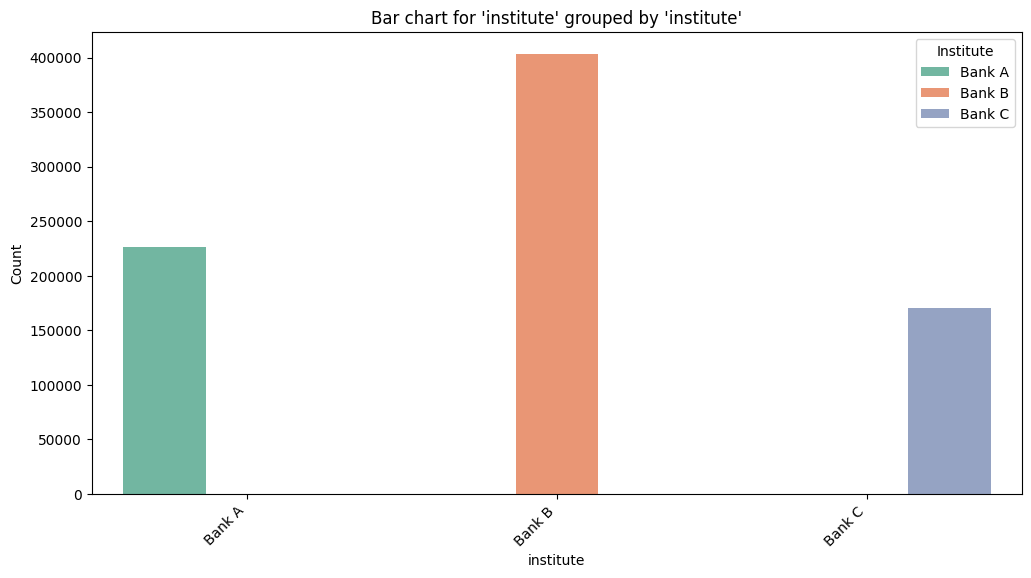

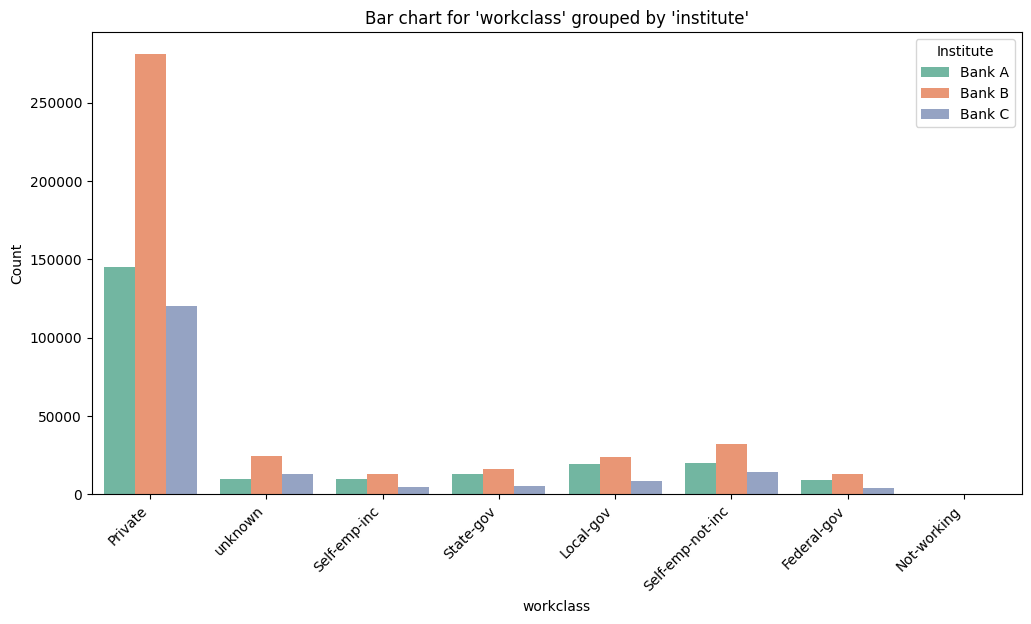

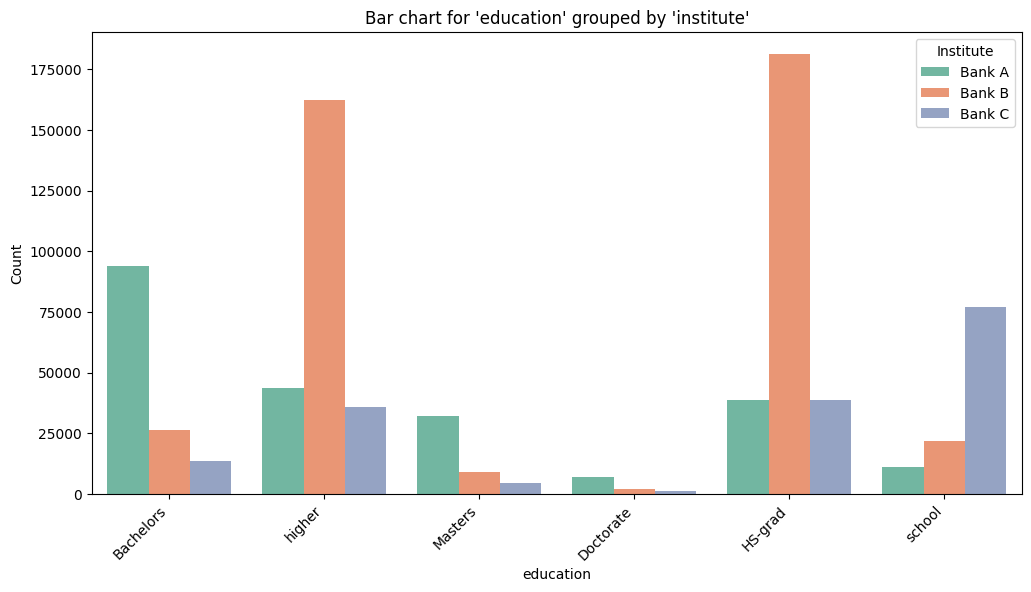

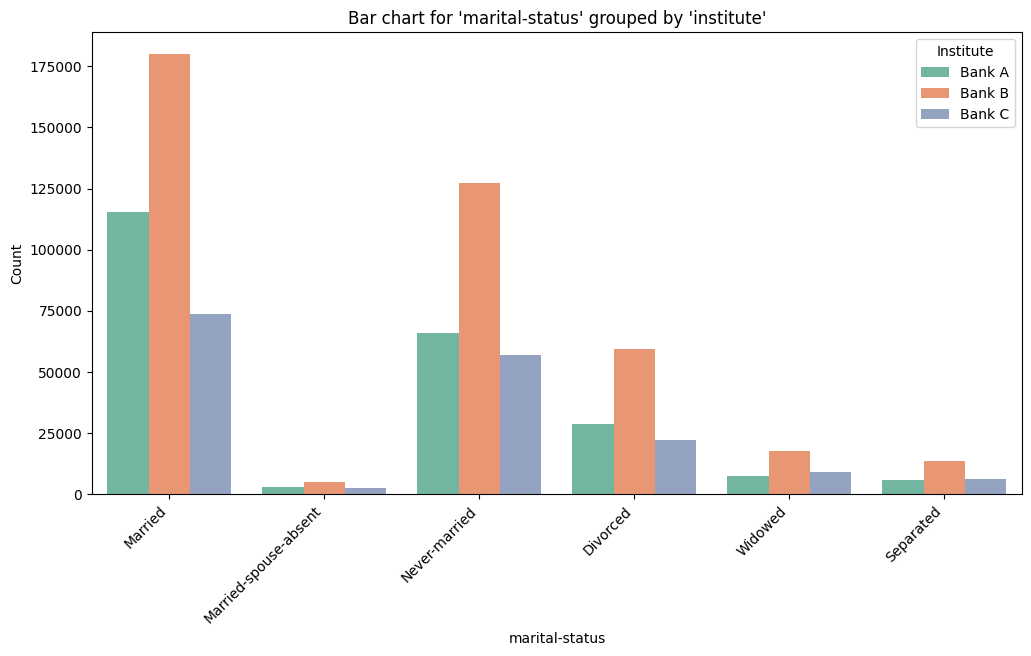

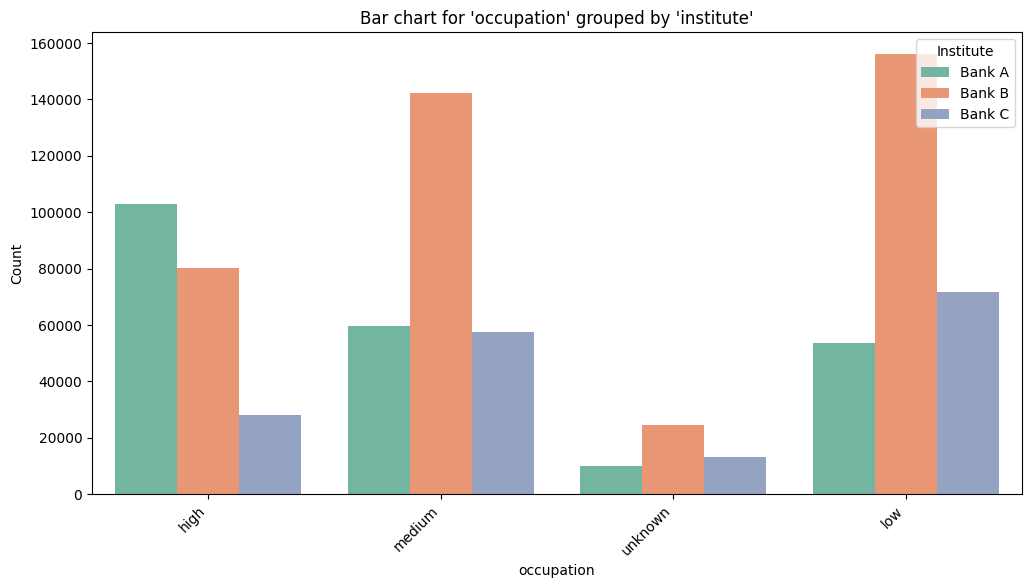

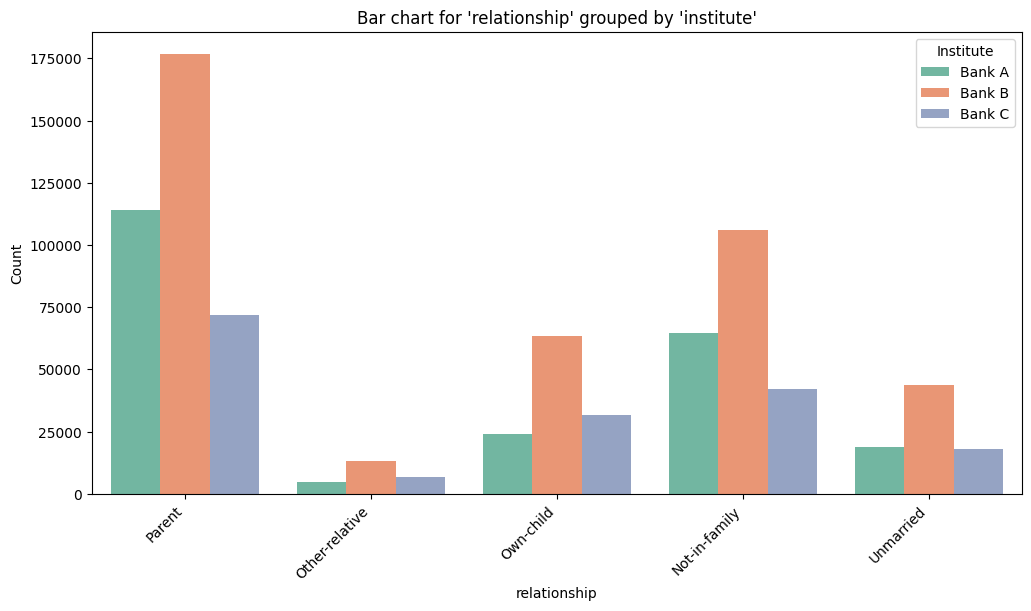

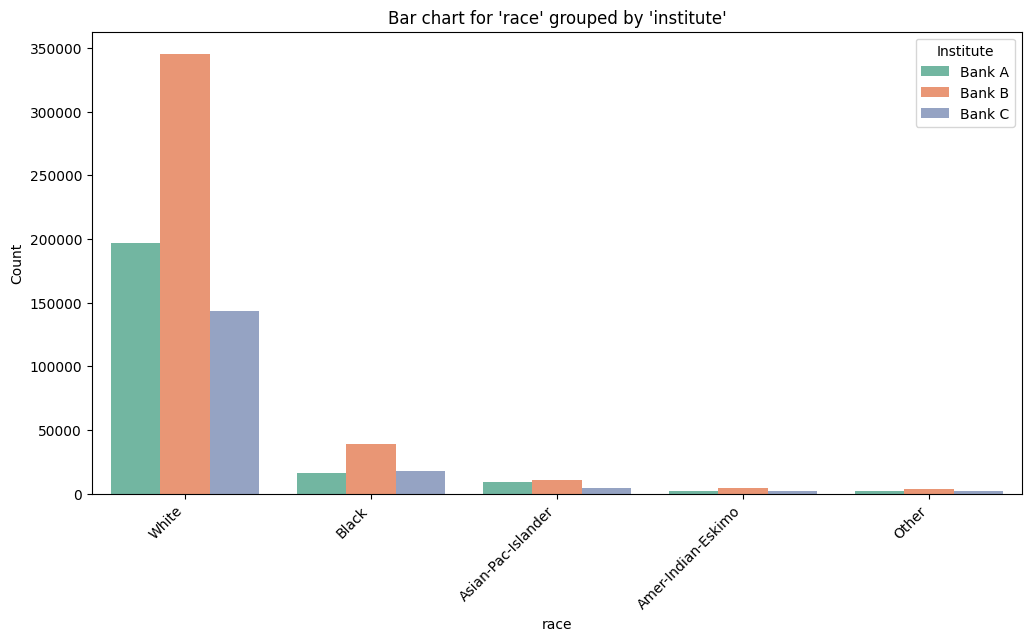

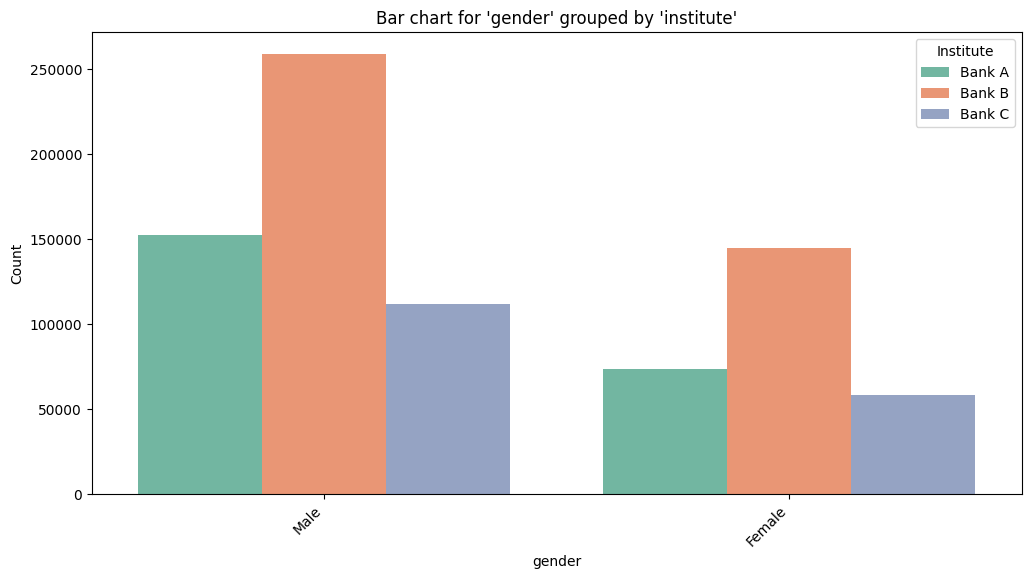

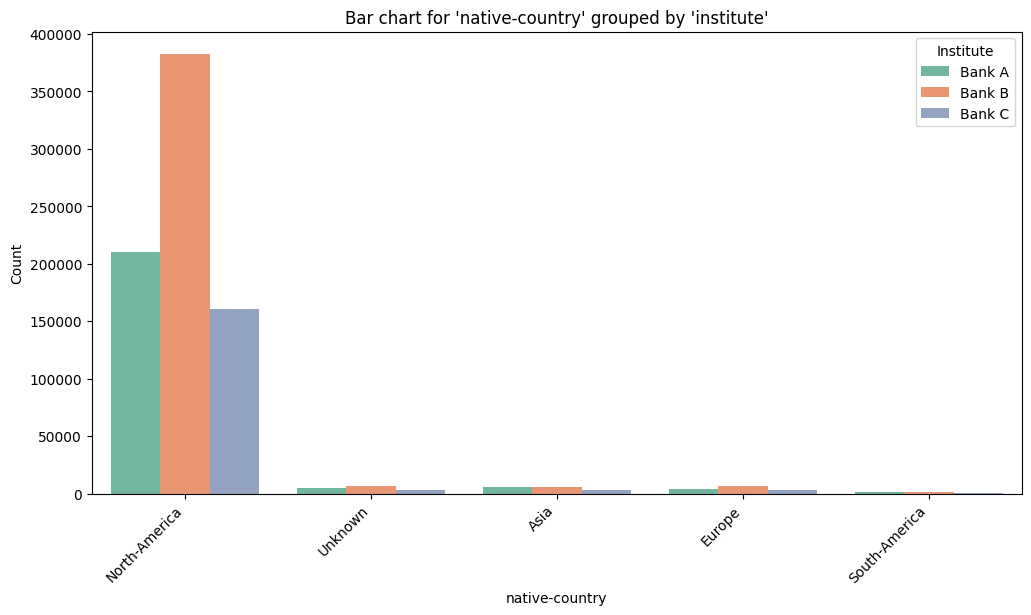

In [16]:
plot_value_counts_by_institute(df)

## Check numeric features from different banks

### Bank A

In [17]:
# excluding 'capital-gain' and 'capital-loss'
col = ['institute', 'age', 'workclass', 'fnlwgt', 'education',
       'educational-num', 'marital-status', 'occupation', 'relationship',
       'race', 'gender', 'hours-per-week','native-country', 'income']

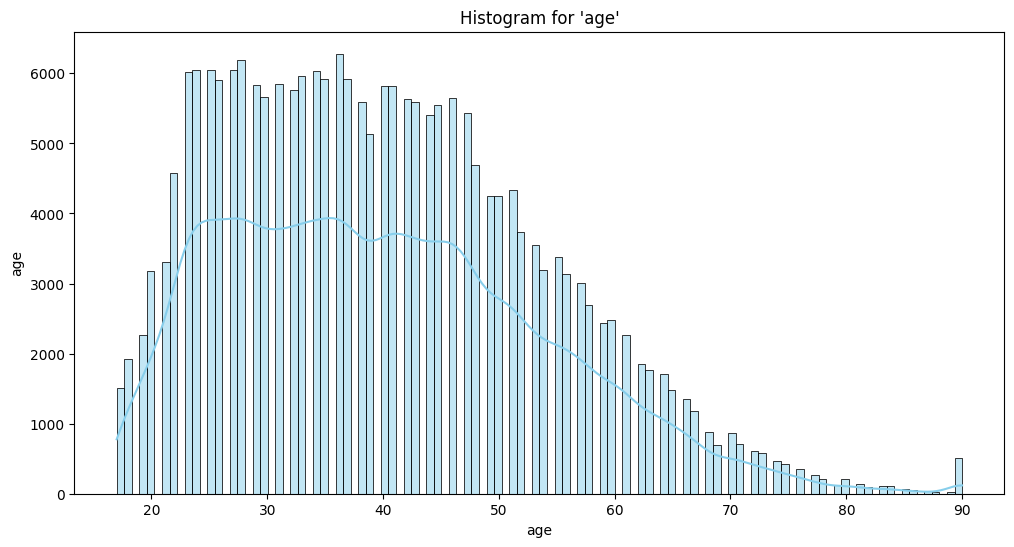

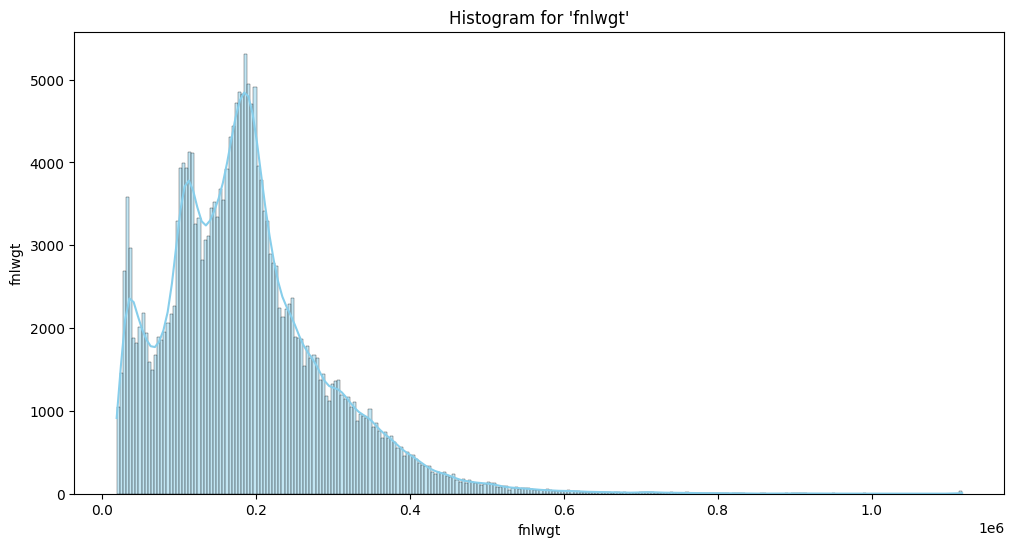

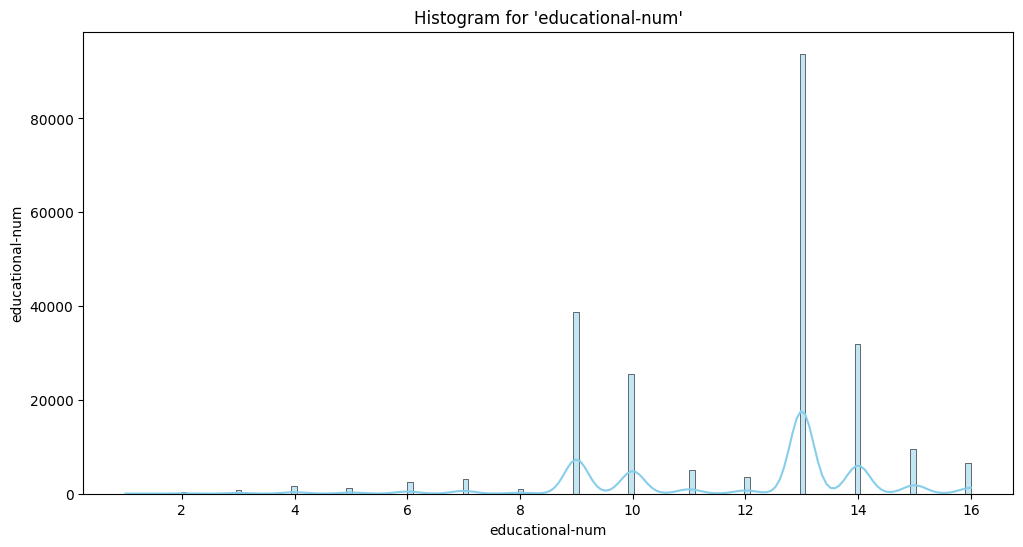

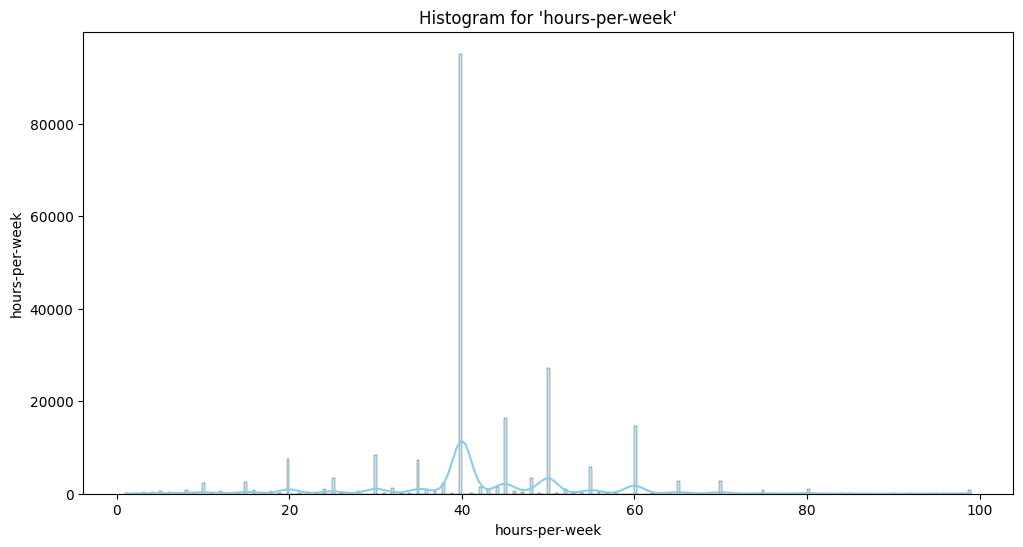

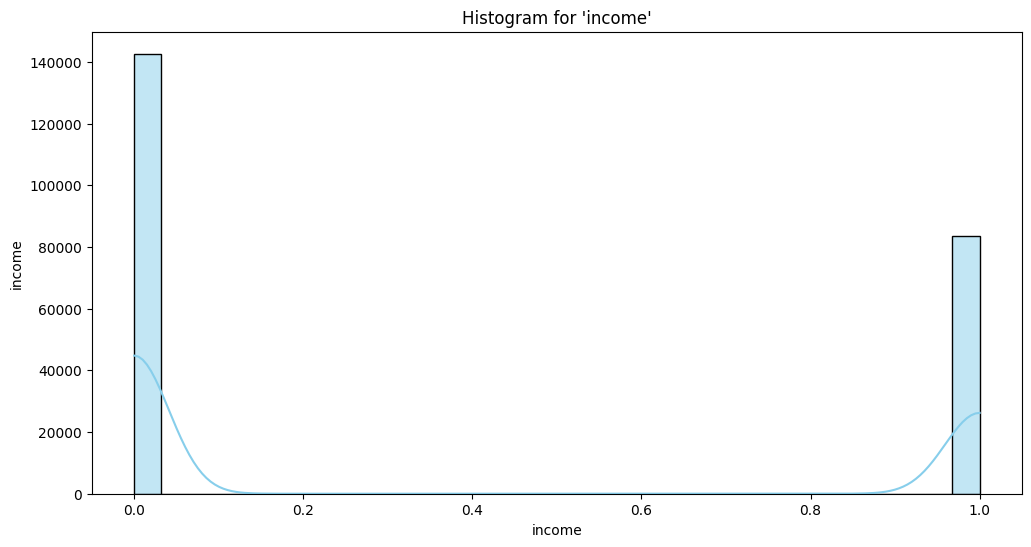

In [18]:
plot_numerical_features(df[df['institute']=='Bank A'], columns=col)

### Bank B

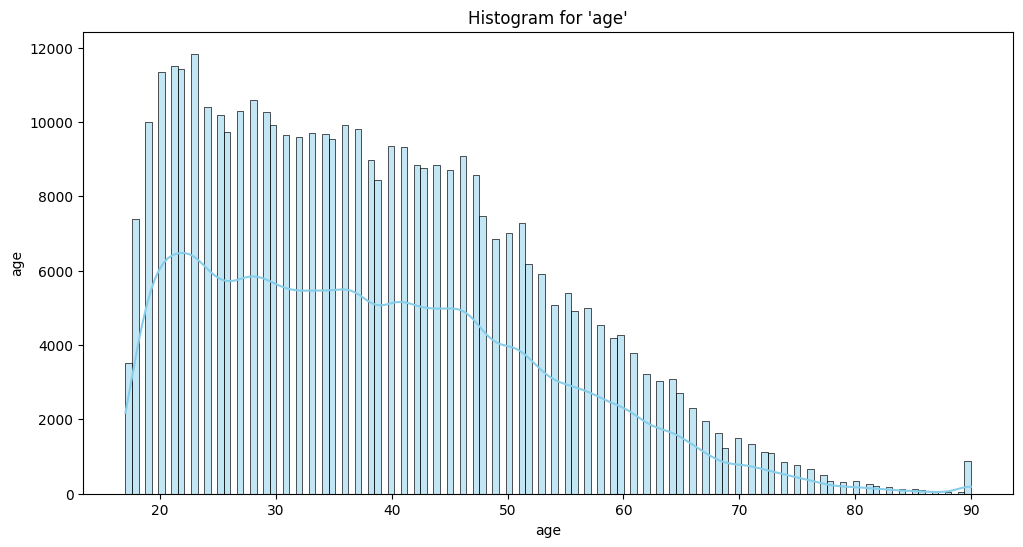

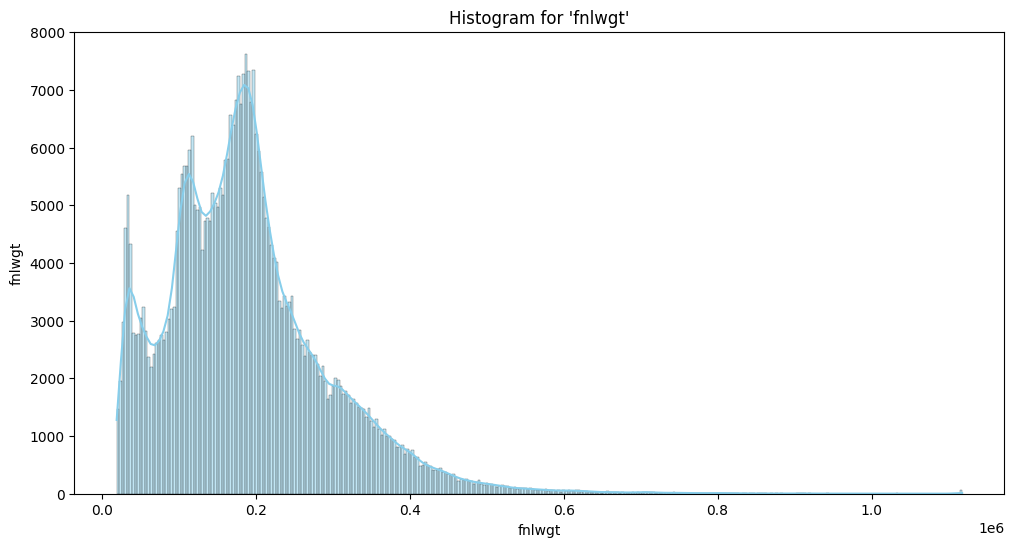

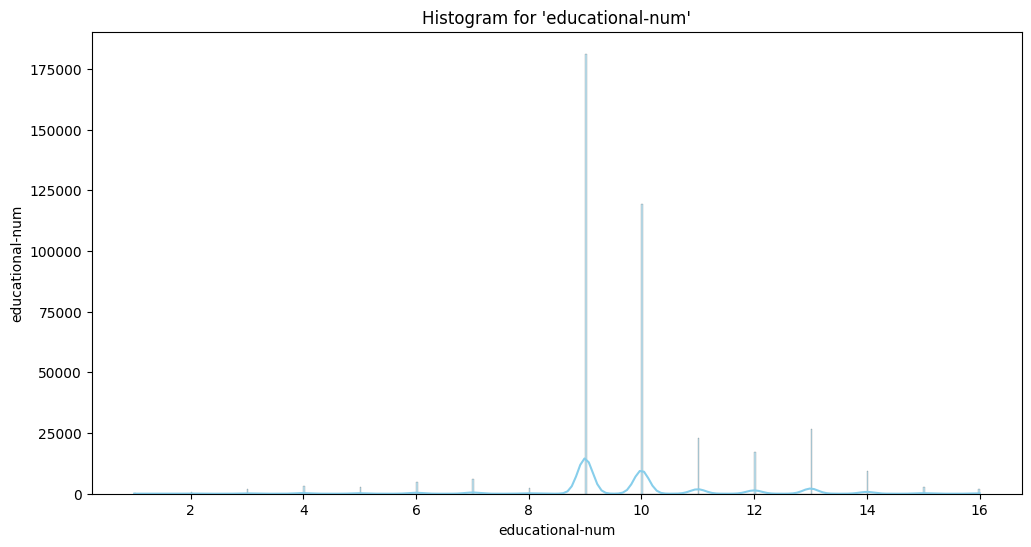

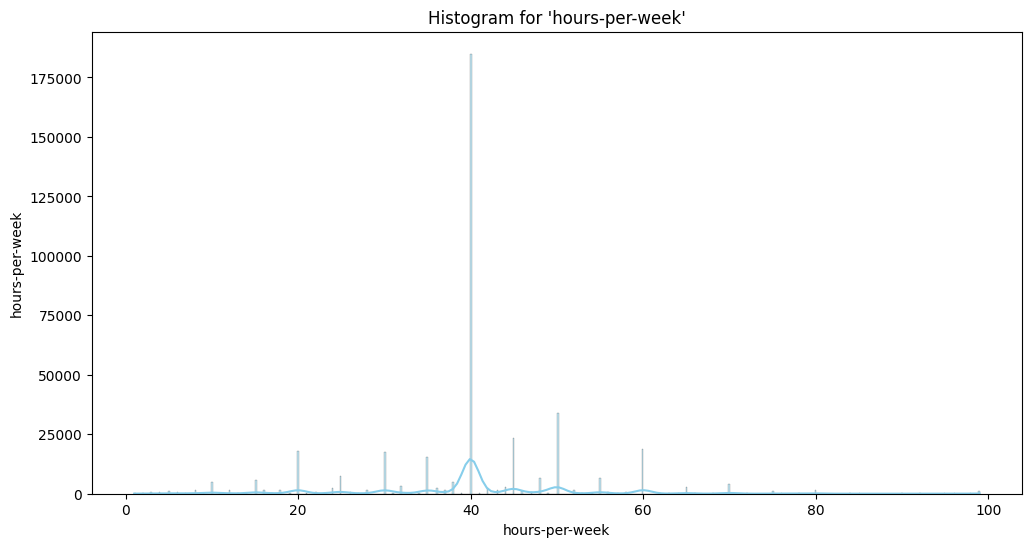

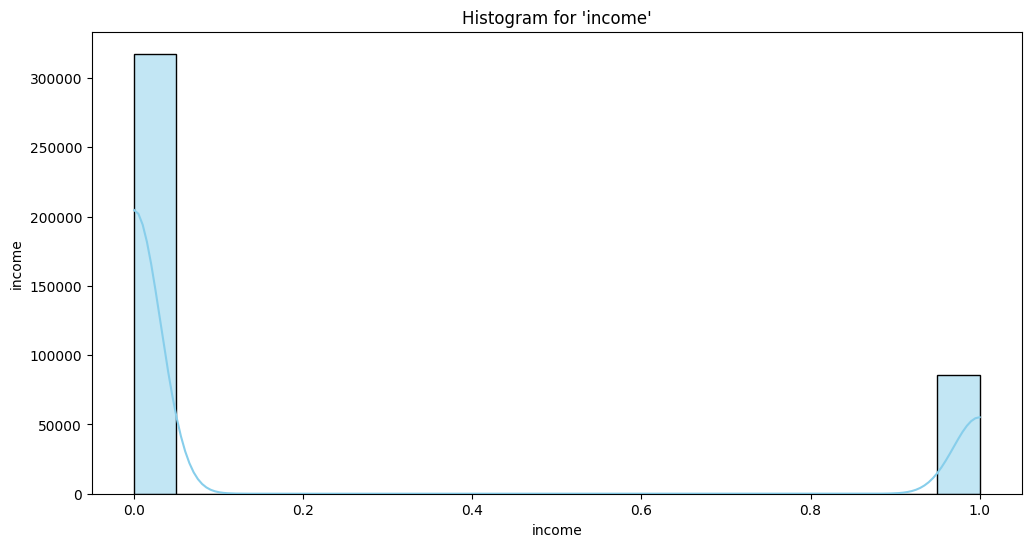

In [19]:
plot_numerical_features(df[df['institute']=='Bank B'], columns=col)

### Bank C

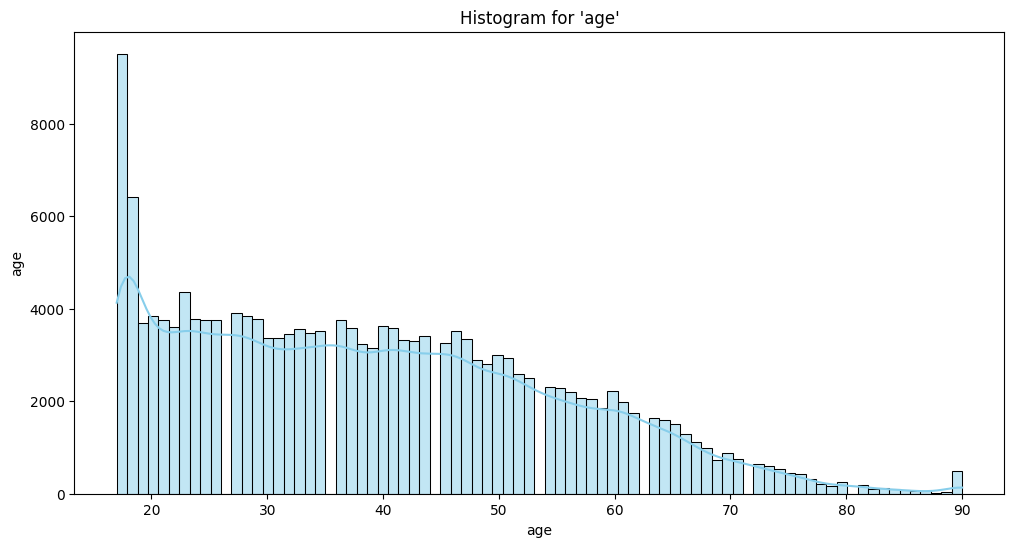

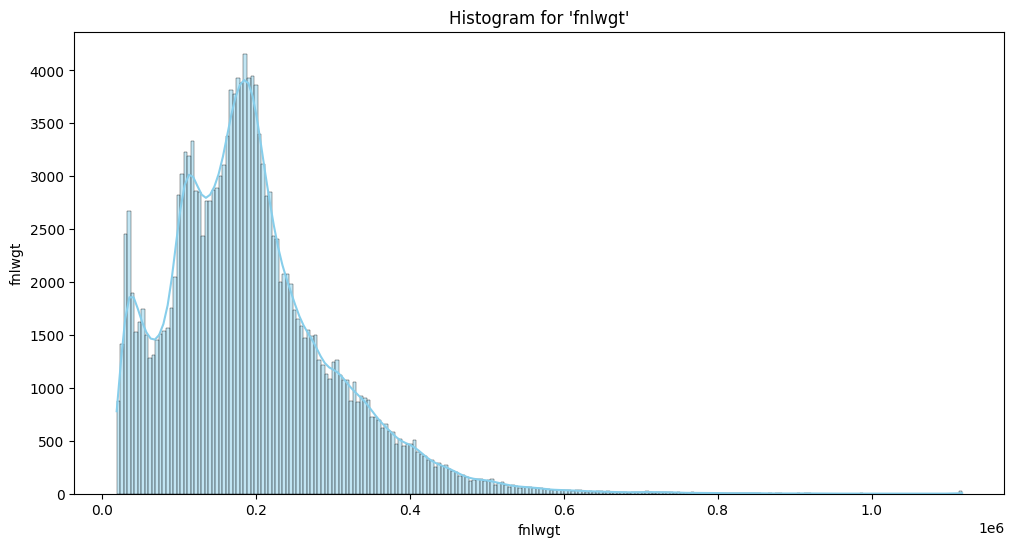

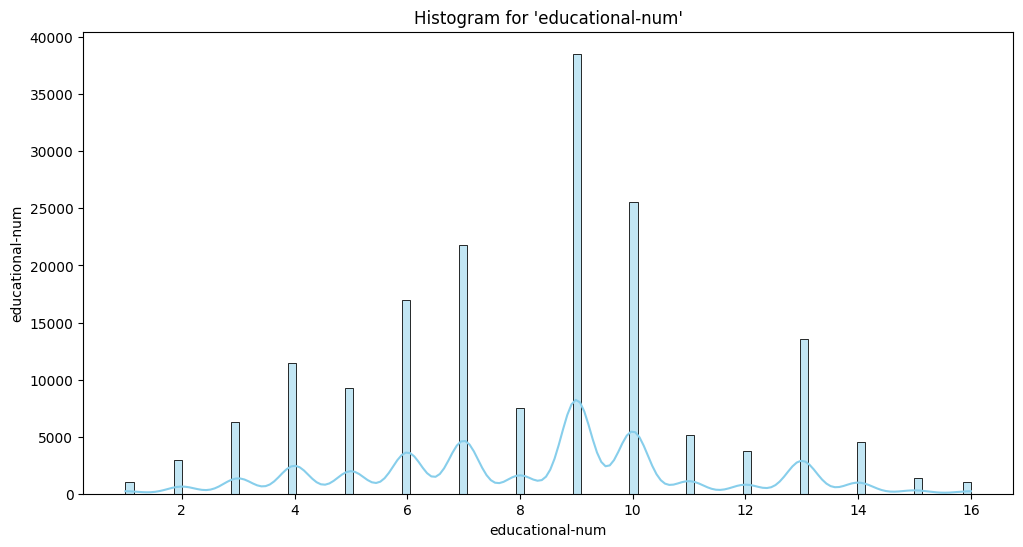

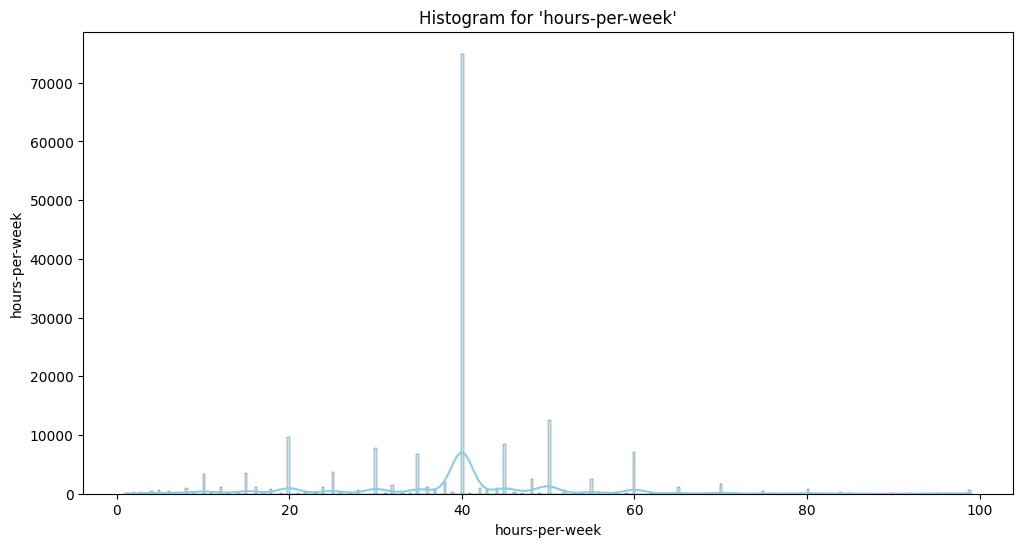

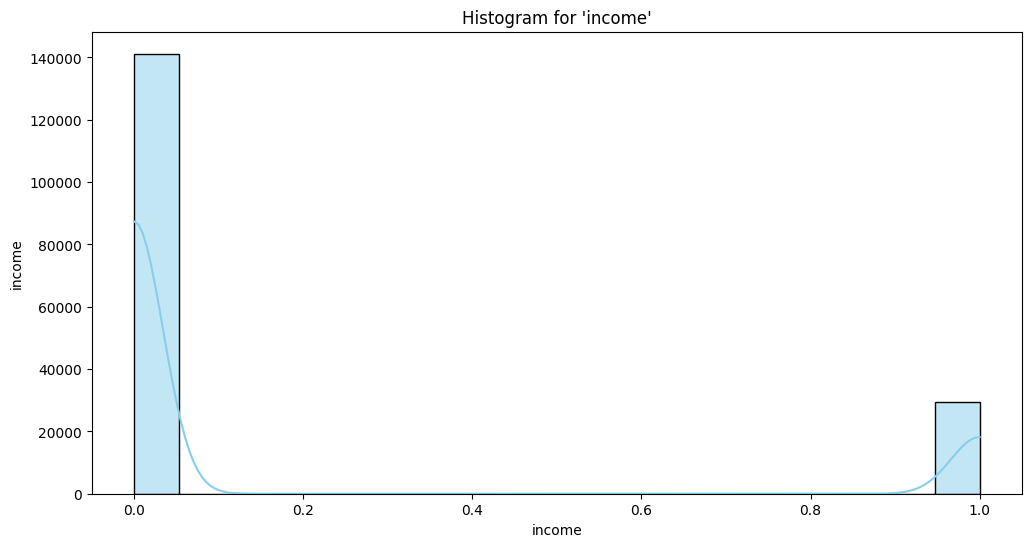

In [20]:
plot_numerical_features(df[df['institute']=='Bank C'], columns=col)

In [22]:
cols = ['age', 'educational-num', 'hours-per-week']

print('Bank A:')
display(df[df['institute']=='Bank A'][cols].describe().T)
print('\nBank B:')
display(df[df['institute']=='Bank B'][cols].describe().T)
print('\nBank C:')
display(df[df['institute']=='Bank C'][cols].describe().T)

Bank A:


,count,mean,std,min,25%,50%,75%,max
age,226164.0,40.189840,13.692167,17.0,29.0,39.0,49.0,90.0
educational-num,226164.0,11.864046,2.445484,1.0,10.0,13.0,13.0,16.0
hours-per-week,226164.0,42.065386,12.853645,1.0,40.0,40.0,50.0,99.0



Bank B:


,count,mean,std,min,25%,50%,75%,max
age,403240.0,38.793106,14.404354,17.0,27.0,37.0,48.0,90.0
educational-num,403240.0,9.805513,1.772689,1.0,9.0,9.0,10.0,16.0
hours-per-week,403240.0,40.111750,12.719453,1.0,38.0,40.0,45.0,99.0



Bank C:


,count,mean,std,min,25%,50%,75%,max
age,170595.0,39.052669,15.926544,17.0,25.0,37.0,50.0,90.0
educational-num,170595.0,8.276304,3.001399,1.0,6.0,9.0,10.0,16.0
hours-per-week,170595.0,38.681984,13.781024,1.0,35.0,40.0,43.0,99.0


### Age Histogram

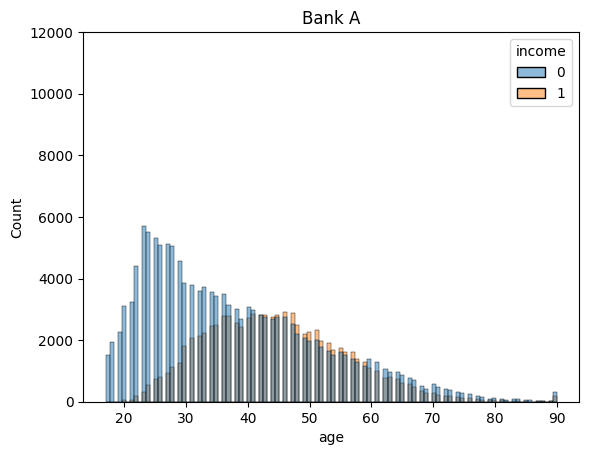

In [23]:
plt.title('Bank A')
plt.ylim(0, 12000)
sns.histplot(data=df[df['institute']=='Bank A'], x='age', hue='income');

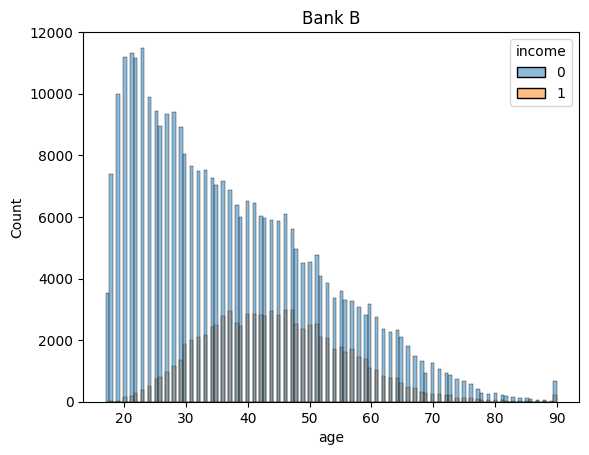

In [24]:
plt.title('Bank B')
plt.ylim(0, 12000)
sns.histplot(data=df[df['institute']=='Bank B'], x='age', hue='income');

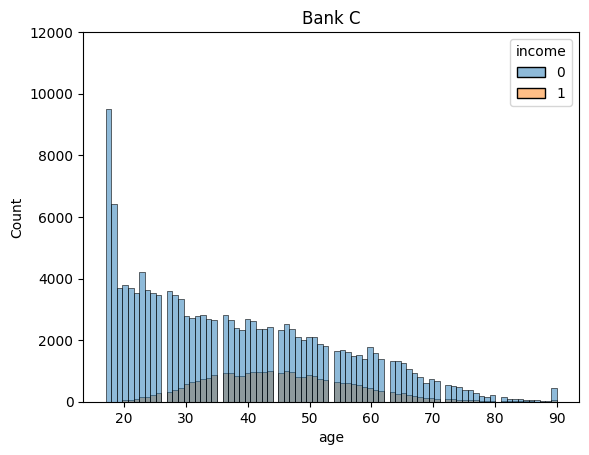

In [25]:
plt.title('Bank C')
plt.ylim(0, 12000)
sns.histplot(data=df[df['institute']=='Bank C'], x='age', hue='income');

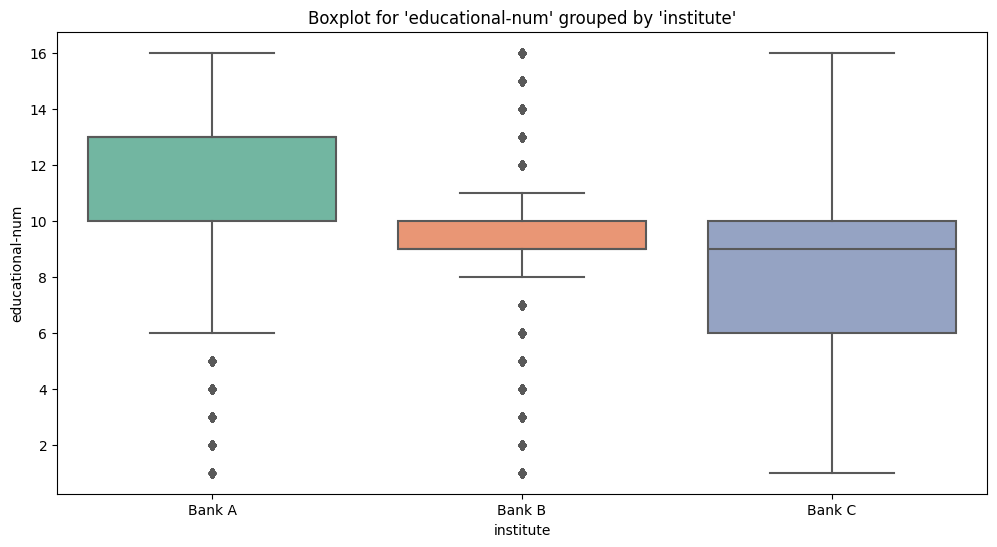

In [42]:
plot_numerical_features(df, columns=['educational-num'], as_boxplt=True)

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


X, y = df.drop('income', axis=1), df['income']

# Label encode categorical columns
cols = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in cols:
    X[column] = label_encoder.fit_transform(X[column])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
# Train a initial decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the initial model
y_pred = dt_model.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy: {initial_accuracy}")

Initial Accuracy: 0.8037


In [161]:
# Forward feature selection
def forward_feature_selection(model, X_train, X_test, y_test, initial_accuracy):
    num_features = X_train.shape[1]
    selected_features = []
    best_accuracy = initial_accuracy

    accuracy_features_lst = []

    for _ in range(num_features):
        best_feature = None
        best_feature_accuracy = 0.0

        for feature_index in range(X.shape[1]):
            print(f'{feature_index = }')
            if feature_index not in selected_features:
                current_features = selected_features + [feature_index]

                X_train_selected = X_train.iloc[:, current_features]
                X_test_selected = X_test.iloc[:, current_features]

                _model = model
                _model.fit(X_train_selected, y_train)
                y_pred_selected = _model.predict(X_test_selected)

                # Evaluate the model's performance
                accuracy = accuracy_score(y_test, y_pred_selected)

                print(f'{accuracy = }\nFeatures: {X_train_selected.columns}')
                accuracy_features_lst.append({'accuracy': accuracy, 'features': X_train_selected.columns})

                # Check if the model with the selected features improves accuracy
                if accuracy > best_feature_accuracy:
                    best_feature_accuracy = accuracy
                    best_feature = feature_index

        # Add the best feature to the selected features
        selected_features.append(best_feature)

        # Update best accuracy if needed
        if best_feature_accuracy > best_accuracy:
            best_accuracy = best_feature_accuracy

    df_acc = pd.DataFrame(accuracy_features_lst)
    df_acc[df_acc['accuracy']==best_accuracy].values
    print(f"Best Accuracy: {df_acc[df_acc['accuracy']==best_accuracy]['accuracy']}")
    print(f"Best Features: {df_acc[df_acc['accuracy']==best_accuracy]['features'].values}")

In [162]:
forward_feature_selection(DecisionTreeClassifier(random_state=42), X_train, X_test, y_test, initial_accuracy)

feature_index = 0
accuracy = 0.7514375
Features: Index(['institute'], dtype='object')
feature_index = 1
accuracy = 0.7514375
Features: Index(['age'], dtype='object')
feature_index = 2
accuracy = 0.7514375
Features: Index(['workclass'], dtype='object')
feature_index = 3
accuracy = 0.67935625
Features: Index(['fnlwgt'], dtype='object')
feature_index = 4
accuracy = 0.76335
Features: Index(['education'], dtype='object')
feature_index = 5
accuracy = 0.77065625
Features: Index(['educational-num'], dtype='object')
feature_index = 6
accuracy = 0.7514375
Features: Index(['marital-status'], dtype='object')
feature_index = 7
accuracy = 0.7514375
Features: Index(['occupation'], dtype='object')
feature_index = 8
accuracy = 0.7514375
Features: Index(['relationship'], dtype='object')
feature_index = 9
accuracy = 0.7514375
Features: Index(['race'], dtype='object')
feature_index = 10
accuracy = 0.7514375
Features: Index(['gender'], dtype='object')
feature_index = 11
accuracy = 0.80209375
Features: Inde

In [ ]:
df['Capital Diff'] = df['capital-gain'] - df['capital-loss']

In [194]:
df[['capital-gain', 'capital-loss', 'income']].value_counts('income')

income
0    601449
1    198550
Name: count, dtype: int64

In [178]:
# Train a initial decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train[['age']], y_train)

# Evaluate the initial model
y_pred = dt_model.predict(X_test[['age']])
initial_accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy: {initial_accuracy}")

Initial Accuracy: 0.7514375


In [112]:
df[['capital-gain', 'capital-loss', 'educational-num', 'marital-status', 'occupation', 'workclass', 'education']]

,capital-gain,capital-loss,educational-num,marital-status,occupation,workclass,education
0,7298,0,13,Married,high,Private,Bachelors
1,0,0,13,Married,medium,Private,Bachelors
2,0,0,13,Married-spouse-absent,unknown,unknown,Bachelors
3,0,0,13,Married,medium,Private,Bachelors
4,15024,0,13,Married,medium,Self-emp-inc,Bachelors
...,...,...,...,...,...,...,...
170590,0,0,6,Never-married,medium,Private,school
170591,0,0,7,Never-married,low,Private,school
170592,0,0,5,Married,medium,Federal-gov,school
170593,0,0,7,Never-married,low,Private,school


In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit_transform(X)

In [ ]:
# Backward feature elimination
num_features = X.shape[1]
selected_features = list(range(num_features))
best_accuracy = initial_accuracy

while len(selected_features) > 1:  # Keep at least one feature
    # Train a new decision tree model with the selected features
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    dt_model.fit(X_train_selected, y_train)
    y_pred_selected = dt_model.predict(X_test_selected)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred_selected)

    # Check if the model with the selected features improves accuracy
    if accuracy >= best_accuracy:
        best_accuracy = accuracy
        removed_feature = selected_features.pop()
        print(f"Removed Feature {removed_feature}: New Accuracy: {best_accuracy}")
    else:
        # If removing the feature results in a drop in accuracy, stop the elimination
        break

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Features: {selected_features}")